# Fitting of Machine learning model for Classification

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Importing data
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# check missing valuse
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

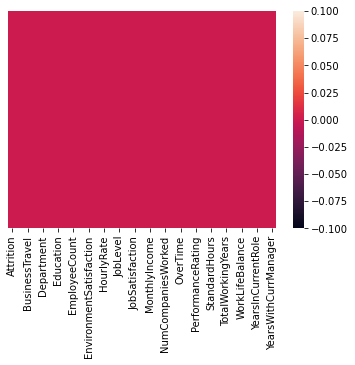

In [5]:
sb.heatmap(data.isnull(),yticklabels=False)

above heatmap show there is no missing values in our data

## Feature Selection

In [6]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Number of observations by categories in 'Attrition' column
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
# Check datatype of "Attrition" column
data['Attrition'].dtypes

dtype('O')

In [12]:
# Replacing categorical data into numeric values
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].replace('No',0, inplace=True)

In [13]:
data.head(10)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,0,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,0,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,0,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,0,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,0,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [14]:
# Replacing categorical data into numeric values
data['EducationField'].replace('Life Sciences',1, inplace=True)
data['EducationField'].replace('Medical',2, inplace=True)
data['EducationField'].replace('Marketing', 3, inplace=True)
data['EducationField'].replace('Other',4, inplace=True)
data['EducationField'].replace('Technical Degree',5, inplace=True)
data['EducationField'].replace('Human Resources', 6, inplace=True)

In [15]:
data['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [16]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [17]:
# Replacing categorical data into numeric values 
data['Department'].replace('Research & Development',1, inplace=True)
data['Department'].replace('Sales',2, inplace=True)
data['Department'].replace('Human Resources', 3, inplace=True)

In [18]:
data['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [19]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [20]:
# Replacing categorical data into numeric values 
data['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
data['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
data['BusinessTravel'].replace('Non-Travel',3, inplace=True)

In [21]:
data['BusinessTravel'].value_counts()

1    1043
2     277
3     150
Name: BusinessTravel, dtype: int64

In [22]:
data['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [23]:
# Replacing categorical data into numeric values
data['Gender'].replace('Male',1, inplace=True)
data['Gender'].replace('Female',0, inplace=True)
data['Gender']

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: int64

In [24]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
data["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [26]:
# Replacing categorical data into numeric values 
data['JobRole'].replace('Sales Executive',1, inplace=True)
data['JobRole'].replace('Research Scientist',2, inplace=True)
data['JobRole'].replace('Laboratory Technician',3, inplace=True)
data['JobRole'].replace('Manufacturing Director',4, inplace=True)
data['JobRole'].replace('Healthcare Representative',5, inplace=True)
data['JobRole'].replace('Manager',6, inplace=True)
data['JobRole'].replace('Sales Representative',7, inplace=True)
data['JobRole'].replace('Research Director',8, inplace=True)
data['JobRole'].replace('Human Resources',9, inplace=True)

In [27]:
data["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [28]:
# Replacing categorical data into numeric values 
data['MaritalStatus'].replace('Married',1, inplace=True)
data['MaritalStatus'].replace('Single',2, inplace=True)
data['MaritalStatus'].replace('Divorced',3, inplace=True)

In [29]:
data["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [30]:
# Replacing categorical data into numeric values 
data["OverTime"].replace('No',0,inplace = True)
data["OverTime"].replace('Yes',1,inplace = True)

In [31]:
# droping unnecessary coloumns
data.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'], axis = 1, inplace = True)

In [32]:
data.dtypes

Attrition                   int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

#### Check the Multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [34]:
x=data.iloc[:,:30]
y=data.iloc[:,30]

In [35]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                     feature         VIF
0                  Attrition    1.472774
1                        Age   33.363975
2             BusinessTravel    5.413736
3                  DailyRate    4.952442
4                 Department    7.667543
5           DistanceFromHome    2.339576
6                  Education    9.429027
7             EducationField    3.812674
8    EnvironmentSatisfaction    7.195064
9                     Gender    2.522724
10                HourlyRate   11.130710
11            JobInvolvement   15.041063
12                  JobLevel   52.182955
13                   JobRole    4.127737
14           JobSatisfaction    7.028572
15             MaritalStatus    6.031274
16             MonthlyIncome   34.068447
17               MonthlyRate    5.021886
18        NumCompaniesWorked    2.769510
19                  OverTime    1.548253
20         PercentSalaryHike   42.618621
21         PerformanceRating  124.231220
22  RelationshipSatisfaction    7.342170
23          Stoc

VIF=1 not correlated.
VIF Between 1 and 5 = moderately correlated.
VIF between 5 and 10 = highly correlated.
VIF Greater than 10 = very highly correlated
we need to remove the variables that have a VIF>10, Threre fore we drop a variables are {'Age','HourlyRate','JobInvolvement','JobLevel','JobLevel','PercentSalaryHike','PerformanceRating','TotalWorkingYears', 'WorkLifeBalance'}


In [36]:
data.drop(['Age','HourlyRate','JobInvolvement','JobLevel','JobLevel','PercentSalaryHike','PerformanceRating','TotalWorkingYears','WorkLifeBalance'], axis = 1, inplace = True)

In [37]:
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,1102,2,1,2,1,2,0,1,...,19479,8,1,1,0,0,6,4,0,5
1,0,2,279,1,8,1,1,3,1,2,...,24907,1,0,4,1,3,10,7,1,7
2,1,1,1373,1,2,2,4,4,1,3,...,2396,6,1,2,0,3,0,0,0,0
3,0,2,1392,1,3,4,1,4,0,2,...,23159,1,1,3,0,3,8,7,3,0
4,0,1,591,1,2,1,2,1,1,3,...,16632,9,0,4,1,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,884,1,23,2,2,3,1,3,...,12290,4,0,3,1,3,5,2,0,3
1466,0,1,613,1,6,1,2,4,1,5,...,21457,4,0,1,1,5,7,7,1,7
1467,0,1,155,1,4,3,1,2,1,4,...,5174,1,1,2,1,0,6,2,0,3
1468,0,2,1023,2,2,3,2,4,1,1,...,13243,2,0,4,0,3,9,6,0,8


#### Response variable

In [38]:
y=data['Attrition']

#### Independent variables 

In [39]:
X= data.drop("Attrition", axis = 1)

### Technique to deal with Imbalanced Classes in Machine Learning

# SMOTE (Synthetic Minority Over-sampling Technique)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

In [41]:
#for imbalenced data we use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [42]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [43]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 826, 1: 158})
After SMOTE : Counter({0: 826, 1: 826})


# Logistic Regression(SMOTE)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [45]:
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_smote, y_train_smote)
model

LogisticRegression(C=0.01, solver='liblinear')

In [46]:
predicted= model.predict(X_test)
predicted

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
probs = model.predict_proba(X_test)
probs

array([[0.75214704, 0.24785296],
       [0.91437125, 0.08562875],
       [0.55493091, 0.44506909],
       [0.22509089, 0.77490911],
       [0.36835267, 0.63164733],
       [0.841169  , 0.158831  ],
       [0.98791469, 0.01208531],
       [0.65664627, 0.34335373],
       [0.83116913, 0.16883087],
       [0.68035688, 0.31964312],
       [0.87725244, 0.12274756],
       [0.30505464, 0.69494536],
       [0.45099186, 0.54900814],
       [0.51532645, 0.48467355],
       [0.89633515, 0.10366485],
       [0.34388377, 0.65611623],
       [0.94746324, 0.05253676],
       [0.29185749, 0.70814251],
       [0.65582229, 0.34417771],
       [0.5908392 , 0.4091608 ],
       [0.56006264, 0.43993736],
       [0.5422024 , 0.4577976 ],
       [0.64526766, 0.35473234],
       [0.80726079, 0.19273921],
       [0.63151791, 0.36848209],
       [0.69583622, 0.30416378],
       [0.52027054, 0.47972946],
       [0.87620461, 0.12379539],
       [0.77739162, 0.22260838],
       [0.50012975, 0.49987025],
       [0.

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [49]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       407
           1       0.34      0.58      0.43        79

    accuracy                           0.74       486
   macro avg       0.62      0.68      0.63       486
weighted avg       0.81      0.74      0.77       486



In [50]:
pd.crosstab(y_test, predicted)

col_0,0,1
Attrition,,
0,316,91
1,33,46


In [51]:
round(accuracy_score(y_test, predicted)*100,0)

74.0

# KNN model(SMOTE)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [53]:
knn.score(X_train_smote, y_train_smote)

0.8450363196125908

In [54]:
predicted_y=knn.predict(X_test)
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       407
           1       0.23      0.52      0.32        79

    accuracy                           0.65       486
   macro avg       0.56      0.59      0.54       486
weighted avg       0.77      0.65      0.69       486



In [55]:
pd.crosstab(y_test, predicted_y)

col_0,0,1
Attrition,,
0,273,134
1,38,41


In [56]:
round(accuracy_score(y_test, predicted_y)*100,0)

65.0

# Random Forest (SMOTE)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [58]:
x=data.drop(["Attrition"],axis=1)


In [59]:
y_predicted = rf.predict(X_test)

In [60]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       407
           1       0.54      0.34      0.42        79

    accuracy                           0.85       486
   macro avg       0.71      0.64      0.66       486
weighted avg       0.83      0.85      0.83       486



In [61]:
pd.crosstab(y_test, y_predicted)

col_0,0,1
Attrition,,
0,384,23
1,52,27


In [62]:
round(accuracy_score(y_test, y_predicted)*100,0)

85.0

 #### CONCLUSION:-
      From above Classifires accuracy of Logistics Rgression(SMOTE) is 74, KNN(SMOTE) is 65 & Random Forest(SMOTE) is 85. It  is  clear that accuracy of Random Forest is larger than all other classifiers. Then we use Random forest(SMOTE) as ML model for predict Hr Attrition 